In [446]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression,f_regression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [447]:
import os
for dirname, _, filenames in os.walk('/oxygen_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [448]:
import pandas as pd # for making data frames and other static analisys
import numpy as np # for numarical operations
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for ploting plots
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer # to impute missing values
from scipy import stats # for taking mode, z_score
from sklearn.preprocessing import StandardScaler #  for scaling
from sklearn.feature_selection import mutual_info_regression,f_regression #for featue selection techniques 
from sklearn.model_selection import train_test_split # to split the data for training and testing
from sklearn.tree import DecisionTreeRegressor # DT model
from sklearn.linear_model import LinearRegression # LR model
from sklearn.ensemble import RandomForestRegressor #RF model
from sklearn.svm import SVR #SVM model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error #evaluation metrix

In [449]:
df = pd.read_csv('oxygen_data.csv')
df.shape
# o/p num of data values + columns

(53, 5)

In [450]:
df.head(3) # first 3 rows

,age,gender,spo2,pr,FT
0,27,0,74,72,1
1,56,0,99,98,0
2,52,0,69,84,1


In [451]:
df.info() # info of data, amount of values not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     53 non-null     int64
 1   gender  53 non-null     int64
 2   spo2    53 non-null     int64
 3   pr      53 non-null     int64
 4   FT      53 non-null     int64
dtypes: int64(5)
memory usage: 2.2 KB


In [452]:
# stats of the data (except gender)
df.describe().drop(["gender"], axis = 1) 

,age,spo2,pr,FT
count,53.000000,53.000000,53.000000,53.000000
mean,52.339623,89.509434,96.396226,0.490566
std,24.080748,13.525791,18.404995,0.504695
min,17.000000,37.000000,61.000000,0.000000
25%,33.000000,84.000000,86.000000,0.000000
50%,52.000000,97.000000,96.000000,0.000000
75%,76.000000,99.000000,108.000000,1.000000
max,100.000000,99.000000,160.000000,1.000000


<AxesSubplot:title={'center':'Heart Rate'}, ylabel='Density'>

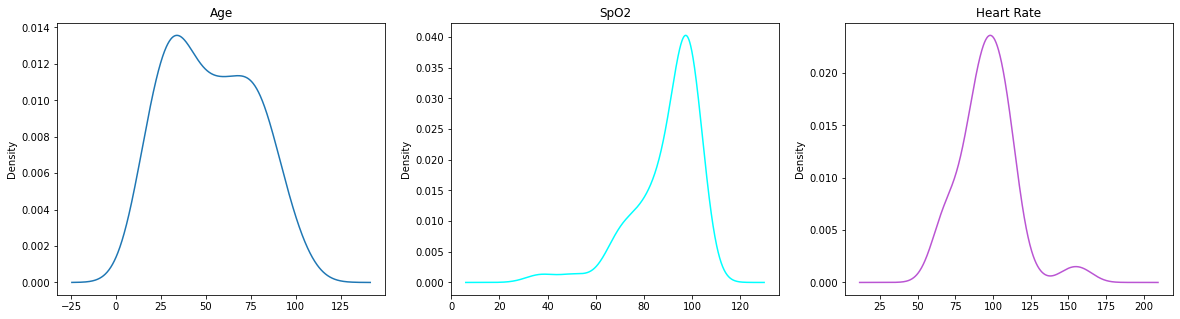

In [453]:
#distribution of data
fig, axes = plt.subplots(1, 3, figsize=(20,5)) #3 plots
df.age.plot(kind = "kde", ax = axes[0], title = "Age" ) 
df.spo2.plot(kind = "kde", ax = axes[1], color = "aqua", title = "SpO2")
df.pr.plot(kind ="kde", ax = axes[2], color = "mediumorchid", title = "Heart Rate")

<AxesSubplot:ylabel='age'>

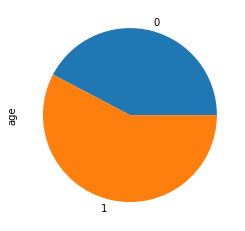

In [454]:
# avg age in each gender, more males
df.groupby("gender").mean()["age"].plot(kind = "pie")

<AxesSubplot:xlabel='pr'>

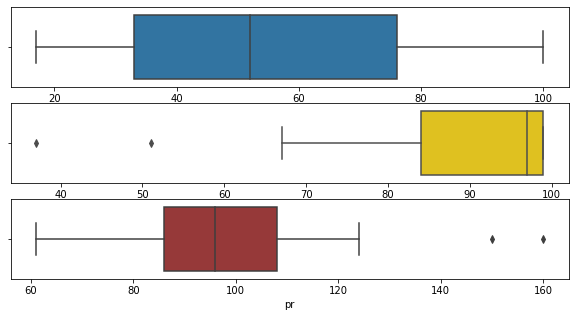

In [455]:
# checking for outliers
fig, axes = plt.subplots(3, 1, figsize=(10, 5))
sns.boxplot(df["age"],ax = axes[0])
sns.boxplot(df["spo2"], ax = axes[1],color = "gold")
sns.boxplot(df["pr"], ax = axes[2],color = "brown")

Features for model

In [456]:
# less corellation between depedent and independent variables
df.corr()[-1:][["age","spo2","pr"]] #(independent cont and dependent cont)

,age,spo2,pr
FT,0.300912,-0.654262,0.227107


In [457]:
# less corellation between dependent and independent variables
df.corr(method = "kendall")[-1:][["gender"]] 

,gender
FT,0.206848


In [458]:
# taking mutual information, telling all the featuers are giving information
arr = mutual_info_regression(df.drop("FT", axis = 1), df["FT"])
pd.Series(arr, index = df.drop("FT", axis = 1).columns)

age       0.000000
gender    0.091778
spo2      0.264510
pr        0.150927
dtype: float64

In [459]:
# conducting Annova Test # telling all the featues are good for model
f_val,p_val = f_regression(df.drop("FT", axis = 1), df["FT"])
pd.DataFrame({"F-value":np.around(f_val,2), "P-value": np.around(p_val,2)}, index = df.drop("FT", axis = 1).columns)

,F-value,P-value
age,5.08,0.03
gender,2.28,0.14
spo2,38.17,0.00
pr,2.77,0.10


Model and training

In [460]:
x = df.drop(["FT","gender"], axis = 1) # uses all variables ecept FT
y = df["FT"] # target variable

In [461]:
# spliting data for training + testing, from sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.33)
#random state controls randomness

In [462]:
# scaling to reduce impact of the outliers (fit only on training data)
std = StandardScaler()
arr = std.fit_transform(x_train)
std_x_tr = pd.DataFrame(arr,columns = x_train.columns)
std_x_tr

,age,spo2,pr
0,0.592018,0.328171,1.985079
1,-1.381376,0.798357,-0.479616
2,1.149717,-1.082388,0.053291
3,-0.308879,-0.074846,-0.013323
4,0.463319,-0.410693,-1.811884
5,-0.737878,-0.948049,1.052492
6,-1.424276,-0.679371,0.319744
7,0.163020,0.798357,-1.878498
8,0.291719,-3.366150,1.052492
9,-0.737878,0.261001,0.386358


In [463]:
# Now we will scale test data set values
arr2 = std.transform(x_test)
std_x_te= pd.DataFrame(arr2,columns = x_test.columns)
std_x_te

,age,spo2,pr
0,-1.338477,0.798357,4.383162
1,-0.566279,0.798357,-1.079137
2,0.935218,0.596849,0.919265
3,0.334619,0.395340,0.452971
4,-0.008580,0.798357,-0.679457
5,0.763618,0.193832,-0.146549
6,-0.566279,-0.074846,-1.745271
7,1.149717,0.664018,-0.479616
8,1.364216,0.395340,3.717028
9,0.077220,0.798357,1.052492


In [464]:
# if Mean Absolute Error high, cant predict values
models = [("linear_regression",LinearRegression()),
          ("DecisionTree_Regression", DecisionTreeRegressor()),
          ("Random_Forest",RandomForestRegressor()),
          ("KNN",KNeighborsRegressor())]

# name of model, model = algorithm
for name, model in models:
      model.fit(std_x_tr, y_train) # fit the model, std_x_tr
      pred = model.predict(std_x_tr) # prediction from training data
      pred1 = model.predict(std_x_te) # predict test data
    
      print(f"""Accuracy of {name} model 
            (Training data: {r2_score(y_train,pred)}) 
            (Test data: {r2_score(y_test,pred1)})""" )
      print(f"""MAE of {name} model 
            (Training data: {mean_absolute_error(y_train,pred)}) 
            (Test data: {mean_absolute_error(y_test,pred1)}) """)
    
      # print(f"""Accuracy of {name} model 
      #       (Test data: {r2_score(y_test,pred1)})
      #       """ )

      # print(f"""MAE of {name} model 
      #     (Test data: {mean_absolute_error(y_test,pred1)})
      #     """)

      print("*"*30)

Accuracy of linear_regression model 
            (Training data: 0.5766278276456613) 
            (Test data: 0.09151458252633293)
MAE of linear_regression model 
            (Training data: 0.2810226924229555) 
            (Test data: 0.41708150512747255) 
******************************
Accuracy of DecisionTree_Regression model 
            (Training data: 1.0) 
            (Test data: 0.55)
MAE of DecisionTree_Regression model 
            (Training data: 0.0) 
            (Test data: 0.1111111111111111) 
******************************
Accuracy of Random_Forest model 
            (Training data: 0.9559068627450981) 
            (Test data: 0.5325850000000001)
MAE of Random_Forest model 
            (Training data: 0.04314285714285715) 
            (Test data: 0.17666666666666667) 
******************************
Accuracy of KNN model 
            (Training data: 0.7437908496732026) 
            (Test data: 0.30700000000000005)
MAE of KNN model 
            (Training data: 0.16) 
     